In [20]:
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt 
spelist = ["Abaumannii", "Efaecium", "Kpneumoniae", "Paeruginosa", "Saureus"]
spelist0 = ["A baumannii", "E faecium", "K pneumoniae", "P aeruginosa", "S aureus"]
for species in spelist:
    print("\n***Check species", spelist0[spelist.index(species)])
    amr_file = "tables/" + species + "_AMRC.csv"
    data = pd.read_csv(amr_file, delimiter=",", header="infer")
    print(data.shape)
    dy = data[data['CRISPR_Cas'] == 1].AMR
    dn = data[data["CRISPR_Cas"] == 0].AMR

    print(f"with CRISPR-Cas count = {len(dy)}, mean = {dy.mean(): .1f}, median = {dy.median(): .1f}, variance= {dy.std(): .1f}")
    print(f"no CRISPR-Cas count = {len(dn)}, mean = {dn.mean(): .1f}, median = {dn.median(): .1f}, variance= {dn.std(): .1f}")
    print(f"all count = {len(data)}, mean = {data.AMR.mean(): .1f}, median = {data.AMR.median(): .1f}, variance= {data.AMR.std(): .1f}")
    
    #Statistical tests
    #stats.ttest_ind(dy, dn, equal_var=False)
    # Mann-Whitney U Test, the nonparametric equivalent of the two sample t-test.
    if species == "Kpneumoniae":            
        result = stats.mannwhitneyu(dy, dn, alternative="greater")
    else:
        result = stats.mannwhitneyu(dy, dn, alternative="less")    
    print(result)
    #The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. 
    result = stats.kruskal(dy, dn)
    print(result)
    
    


***Check species Abaumannii
(4893, 3)
with CRISPR-Cas count = 771, mean =  9.8, median =  11.0, variance=  6.4
no CRISPR-Cas count = 4122, mean =  12.1, median =  14.0, variance=  6.5
all count = 4893, mean =  11.7, median =  14.0, variance=  6.6
MannwhitneyuResult(statistic=1200532.5, pvalue=1.2313704539910553e-27)
KruskalResult(statistic=117.30429485520833, pvalue=2.4623660157182848e-27)

***Check species Efaecium
(2223, 3)
with CRISPR-Cas count = 55, mean =  3.8, median =  3.0, variance=  3.0
no CRISPR-Cas count = 2168, mean =  10.5, median =  13.0, variance=  6.6
all count = 2223, mean =  10.3, median =  12.0, variance=  6.7
MannwhitneyuResult(statistic=26582.5, pvalue=8.771483837248947e-13)
KruskalResult(statistic=49.74263359541545, pvalue=1.7529510461798815e-12)

***Check species Kpneumoniae
(10053, 3)
with CRISPR-Cas count = 3256, mean =  13.4, median =  14.0, variance=  7.8
no CRISPR-Cas count = 6797, mean =  12.9, median =  14.0, variance=  7.4
all count = 10053, mean =  13.1

(2223, 3)


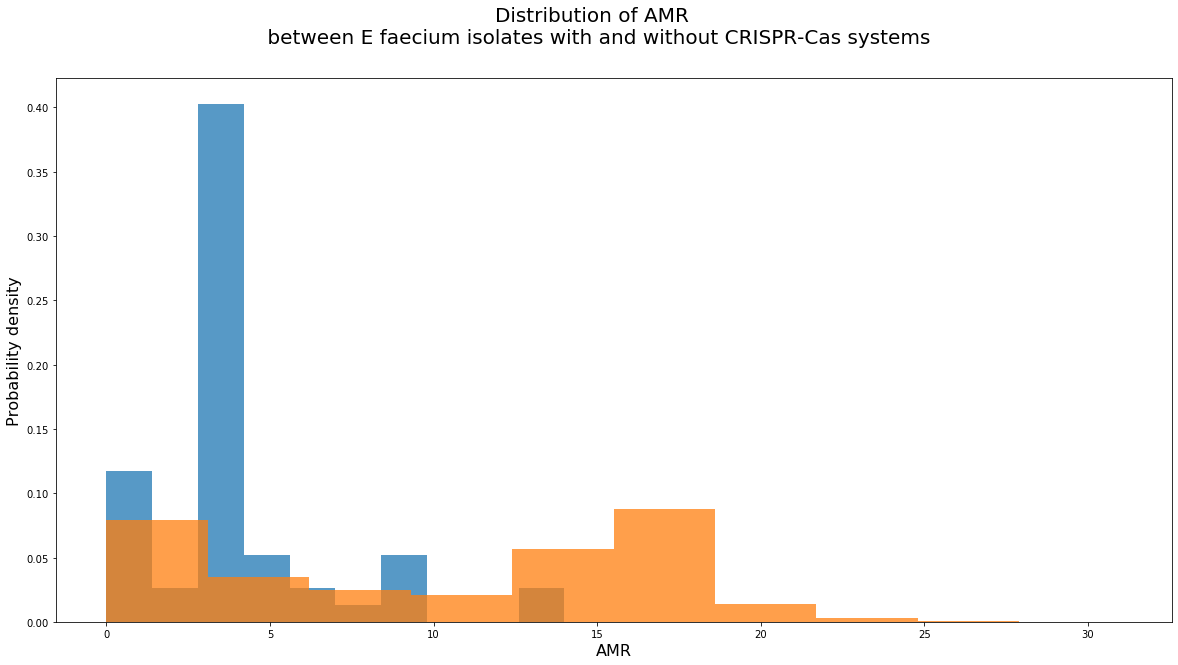

In [23]:
#show histogram for an example species
species = "Efaecium"
species0 = "E faecium"
amr_file = "tables/" + species + "_AMRC.csv"
data = pd.read_csv(amr_file, delimiter=",", header="infer")
print(data.shape)
dy = data[data['CRISPR_Cas'] == 1].AMR
dn = data[data["CRISPR_Cas"] == 0].AMR
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)
presence = plt.hist(dy, label= "with CRISPR-Cas", density= True, alpha=0.75)
abscent = plt.hist(dn, label= "without CRISPR-Cas", density= True, alpha=0.75)

plt.suptitle(f"Distribution of AMR \n between {species0} isolates with and without CRISPR-Cas systems", fontsize= 20)
plt.xlabel("AMR", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)
plt.show()